In [1127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1185]:
netflix=pd.read_csv('C:/Users/asus/Downloads/netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Basic checks on data

In [1186]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [1187]:
netflix.shape

(8807, 12)

In [1188]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [1189]:
netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [1190]:
netflix.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [1191]:
netflix.isnull().sum()/len(netflix)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [1192]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Unnesting of the data, whichever columns are nested

In [1193]:
# Checking if the "director" column is nested
netflix[netflix["director"].apply(lambda x: "," in str(x))].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",NaN,"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so..."
68,s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",Michael Schumacher,NaN,"September 15, 2021",2021,TV-14,113 min,"Documentaries, International Movies, Sports Mo...",Through exclusive interviews and archival foot...


In [1194]:
# Assigning new variable "new_df" for "netflix"

import copy

new_df = copy.deepcopy(netflix)


new_df['director'] = new_df['director'].apply(lambda x: str(x).split(', '))
new_df = new_df.explode('director')
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,nan,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,nan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [1195]:
new_df[new_df['director'].apply(lambda x: "," in str(x))].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [1196]:
new_df['cast'] = new_df['cast'].apply(lambda x: str(x).split(', '))
new_df = new_df.explode('cast')
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [1197]:
new_df[new_df['cast'].apply(lambda x: "," in str(x))].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [1198]:
new_df['country'] = new_df['country'].apply(lambda x: str(x).split(', '))
new_df = new_df.explode('country')
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [1199]:
new_df[new_df['country'].apply(lambda x: "," in str(x))].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1192,s1193,Movie,The Present,Farah Nabulsi,Saleh Bakri,"United Kingdom,","March 18, 2021",2020,TV-MA,24 min,"Dramas, International Movies",Yusuf and his daughter set out to buy his wife...
1192,s1193,Movie,The Present,Farah Nabulsi,Maryam Kanj,"United Kingdom,","March 18, 2021",2020,TV-MA,24 min,"Dramas, International Movies",Yusuf and his daughter set out to buy his wife...
1192,s1193,Movie,The Present,Farah Nabulsi,Maryam Kamiel Basha,"United Kingdom,","March 18, 2021",2020,TV-MA,24 min,"Dramas, International Movies",Yusuf and his daughter set out to buy his wife...
1192,s1193,Movie,The Present,Farah Nabulsi,Ameer Khlawe,"United Kingdom,","March 18, 2021",2020,TV-MA,24 min,"Dramas, International Movies",Yusuf and his daughter set out to buy his wife...
1192,s1193,Movie,The Present,Farah Nabulsi,Ala' Hanani,"United Kingdom,","March 18, 2021",2020,TV-MA,24 min,"Dramas, International Movies",Yusuf and his daughter set out to buy his wife...


In [1200]:
new_df['country'] = new_df['country'].apply(lambda x: str(x).split(','))
new_df = new_df.explode('country')
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [1201]:
new_df[new_df['country'].apply(lambda x: "," in str(x))].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [1202]:
new_df['listed_in'] = new_df['listed_in'].apply(lambda x: str(x).split(', '))
new_df = new_df.explode('listed_in')
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [1203]:
new_df[new_df['listed_in'].apply(lambda x: "," in str(x))].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [1204]:
new_df.shape

(202065, 12)

In [1205]:
new_df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added      158
release_year      0
rating           67
duration          3
listed_in         0
description       0
dtype: int64

In [1206]:
# Assigning new variable "df2" for "new_df" and replacing the string 'nan' with np.nan
new_df = new_df.replace("nan", np.nan)
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [1207]:
new_df.isna().sum()

show_id             0
type                0
title               0
director        50643
cast             2149
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

In [1208]:
new_df.loc[new_df["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


# Fixing the 'duration and rating' columns

In [1216]:
# Replacing the 3 NaN values in 'Duration' column with the values present in 'Rating' column.(As seen above)
new_df.loc[new_df['duration'].isnull(), 'duration'] = new_df.loc[new_df['duration'].isnull(), 'rating']

# Replacing those 3 "min" values in "Rating" column with "NR" (Not Rated)
new_df.loc[new_df['rating'].str.contains('min'), 'rating']='NR'

# Replacing all the NaN values in "Rating" column with "NR" (Not Rated)
new_df['rating'].fillna('NR', inplace=True)

In [1217]:
new_df.isna().sum()
# Column "Rating" and "Duration" is fixed

show_id             0
type                0
title               0
director        50643
cast             2149
country         11897
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
dtype: int64

# Fixing the "date_added" column

In [1214]:
# Imputing the column "date_added" with - the mode value of 'date added' for all the unique "release_year".
# Suppose for "release_year"=2013, mode "date_added"=April 9,2015, is imputed in missing "date_added" column for 2013

for year in new_df[new_df["date_added"].isnull()]['release_year'].unique():
    fill_value = new_df.loc[new_df["release_year"]==year]['date_added'].mode().values[0]
    new_df.loc[new_df["release_year"]==year,'date_added']=new_df.loc[new_df["release_year"]==year, 'date_added'].fillna(fill_value)


In [1264]:
new_df.isna().sum()

show_id             0
type                0
title               0
director        50643
cast             2149
country         11897
date_added          0
release_year        0
rating              0
duration            0
genre               0
description         0
dtype: int64

# Fixing the'director' column

In [ ]:
# Renaming 'listed_in' column as 'genre'
new_df.rename(columns={"listed_in" : "genre"}, inplace=True)


In [1430]:
# Checking the data with groupby()
ab=new_df.groupby(['genre', 'country'])['director'].apply(lambda x: x.mode().head(1))
ab.reset_index().drop('level_2', axis=1)

,genre,country,director
0,Action & Adventure,Angola,Chris Roland
1,Action & Adventure,Argentina,Pietro Scappini
2,Action & Adventure,Australia,Simon Wincer
3,Action & Adventure,Bahamas,Martin Campbell
4,Action & Adventure,Belgium,Esteban Crespo
...,...,...,...
1094,Thrillers,United Kingdom,Paul Katis
1095,Thrillers,United States,David Fincher
1096,Thrillers,Venezuela,Sebastián Schindel
1097,Thrillers,Vietnam,Van M. Pham


In [1445]:
# Defining a function to use above code on the data
def fill_value(df,a):
    x = df.groupby(['genre', 'country'])[a].apply(lambda x: x.mode().head(1))
    x.reset_index().drop("level_2", axis= 1)
    return df.merge(x, on=["genre", 'country'], how='left')
    

In [1446]:
# Calling the above function on my data and 'director' column
df = new_df
a= 'director'
df_1 = fill_value(df, a)

In [1447]:
df_1.loc[df_1['director_x'].isnull(), 'director_x']= df_1['director_y'] 

In [1448]:
# Renaming columns 'director_x' as 'director' and droping 'director_y'
df_1 = df_1.rename(columns={'director_x': 'director'})
df_1 = df_1.drop('director_y', axis=1)

In [1449]:
df_1.isnull().sum()

show_id             0
type                0
title               0
director        12678
cast             2149
country         11897
date_added          0
release_year        0
rating              0
duration            0
genre               0
description         0
dtype: int64

In [1455]:
# Imputing the rest of missing values in "director" with --- the most frequent(mode) director of the associated genre.

for k in df_1[df_1["director"].isnull()]['genre'].unique():
    
    if k in df_1[~df_1["director"].isnull()]['genre'].unique():
        
        fill_value = df_1.loc[df_1["genre"] == k]['director'].mode().values[0]
         
        df_1.loc[df_1["genre"] == k, 'director'] = df_1.loc[df_1["genre"]==k, 'director'].fillna(fill_value)

In [1456]:
df_1.isnull().sum()

show_id             0
type                0
title               0
director            0
cast             2149
country         11897
date_added          0
release_year        0
rating              0
duration            0
genre               0
description         0
dtype: int64

# Fixing the 'cast' column

In [1458]:
# Defining the same function again and calling it on 'cast' column now.
def fill_value(df,a):
    x = df.groupby(['genre', 'country'])[a].apply(lambda x: x.mode().head(1))
    x.reset_index().drop("level_2", axis= 1)
    return df.merge(x, on=["genre", 'country'], how='left')
    
df = df_1
a= 'cast'
df_2 = fill_value(df, a)

In [1459]:
df_2.loc[df_2['cast_x'].isnull(), 'cast_x']= df_2['cast_y'] 

In [1460]:
# Renaming columns 'cast' as 'cast' and droping 'cast'
df_2 = df_2.rename(columns={'cast_x': 'cast'})
df_2 = df_2.drop('cast_y', axis=1)

In [1461]:
df_2.isnull().sum()

show_id             0
type                0
title               0
director            0
cast              394
country         11897
date_added          0
release_year        0
rating              0
duration            0
genre               0
description         0
dtype: int64

In [1462]:
# Still some NaN values, eplacing the rest missing values with 'Unknown Cast'
df_2["cast"].fillna("Unknown Cast", inplace=True)

In [1463]:
df_2.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country         11897
date_added          0
release_year        0
rating              0
duration            0
genre               0
description         0
dtype: int64

# Fixing the "Country" column

In [1464]:
# Defining the same function again for 'country' column, this time groupby([['genre', 'director']])
def fill_value(df,a):
    x = df.groupby(['genre', 'director'])[a].apply(lambda x: x.mode().head(1))
    x.reset_index().drop("level_2", axis= 1)
    return df.merge(x, on=["genre", 'director'], how='left')
    
df = df_2
a= 'country'
df_final = fill_value(df, a)

In [1466]:
df_final.loc[df_final['country_x'].isnull(), 'country_x']= df_final['country_y'] 
# Renaming columns 'cast' as 'cast' and droping 'cast'
df_final = df_final.rename(columns={'country_x': 'country'})
df_final = df_final.drop('country_y', axis=1)

In [1467]:
df_final.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country         5068
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
dtype: int64

In [1468]:
# Imputing the rest of missing values in "country" with --- the most frequent(mode) country of the associated director.

for i in df_final[df_final["country"].isnull()]['director'].unique():
    
    if i in df_final[~df_final["country"].isnull()]['director'].unique():
        
        fill_value = df_final.loc[df_final["director"]==i]['country'].mode().values[0]
        
        df_final.loc[df_final["director"]==i, 'country'] = df_final.loc[df_final["director"]==i, 'country'].fillna(fill_value)

In [1470]:
df_final.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country         4276
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
dtype: int64

In [1471]:
# Imputing the rest of missing values in "country" with --- the most frequent(mode) country of the associated cast.

for i in df_final[df_final["country"].isnull()]['cast'].unique():
    
    if i in df_final[~df_final["country"].isnull()]['cast'].unique():
        
        fill_value = df_final.loc[df_final["cast"]==i]['country'].mode().values[0]
        
        df_final.loc[df_final["cast"]==i, 'country'] = df_final.loc[df_final["cast"]==i, 'country'].fillna(fill_value)

In [1473]:
# Still missing values in "Country" column, replacing them with "Unknown Country"
df_final["country"].fillna("Unknown Country", inplace=True)

In [1475]:
df_final.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genre           0
description     0
dtype: int64

# EDA on final data which is 'df_final'

In [1537]:
df_final['type'].value_counts(normalize=True)*100

Movie      72.212902
TV Show    27.787098
Name: type, dtype: float64

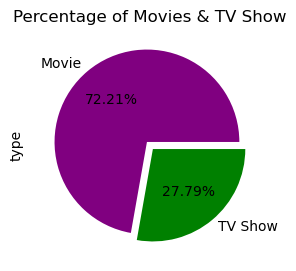

In [1795]:
plt.figure(figsize=(8,3))
df_final['type'].value_counts().plot(kind='pie',autopct="%.2f%%", explode=(0.05,0.05), colors=['purple', 'green'])
plt.title('Percentage of Movies & TV Show')
plt.show()

### Overall more than 2-3rd of the contents is movie and less than 1-3rd is tv show

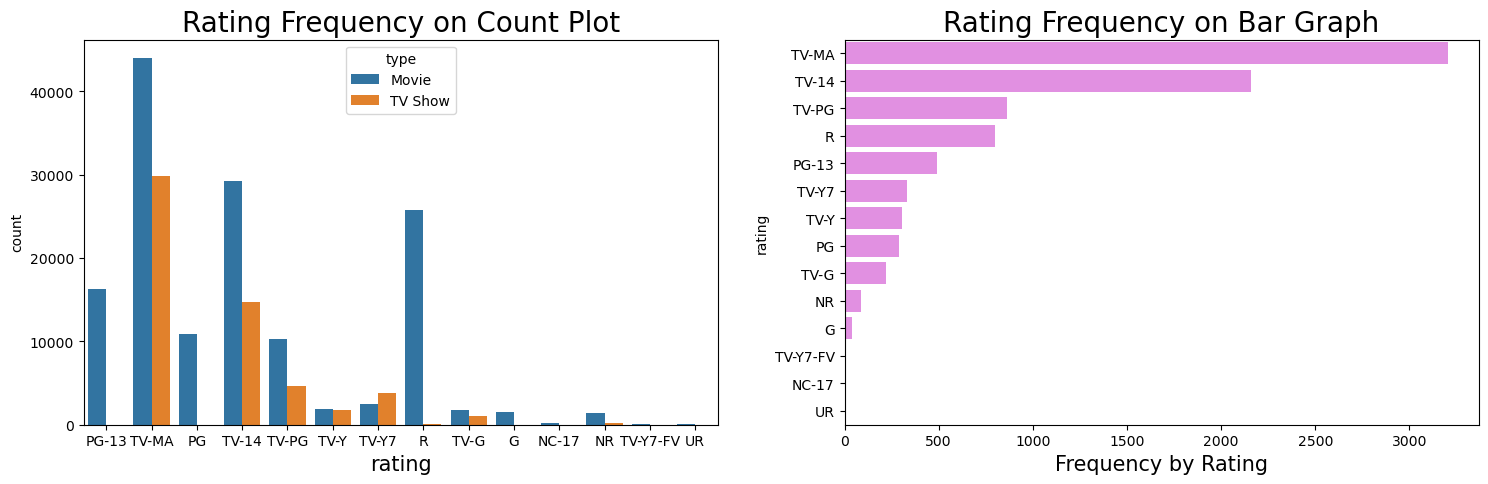

In [1915]:
df_rating = df_final.groupby('rating').agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18,5))

sns.countplot(data = df_final, x='rating', hue = 'type', ax=axes[0])
axes[0].set_title('Rating Frequency on Count Plot', fontsize=20)
axes[0].set_xlabel('rating', fontsize=15)

sns.barplot(data = df_rating, x='title', y='rating', orient='h', color='violet', ax=axes[1])
axes[1].set_title('Rating Frequency on Bar Graph', fontsize=20)
axes[1].set_xlabel('Frequency by Rating', fontsize=15)

plt.subplots_adjust(wspace=0.2)
plt.show()

### So it is apparent that the popular ratings across Netflix include Mature Audience and those appropriate for over 14 age.
### There are almost no TV show having the rating of R

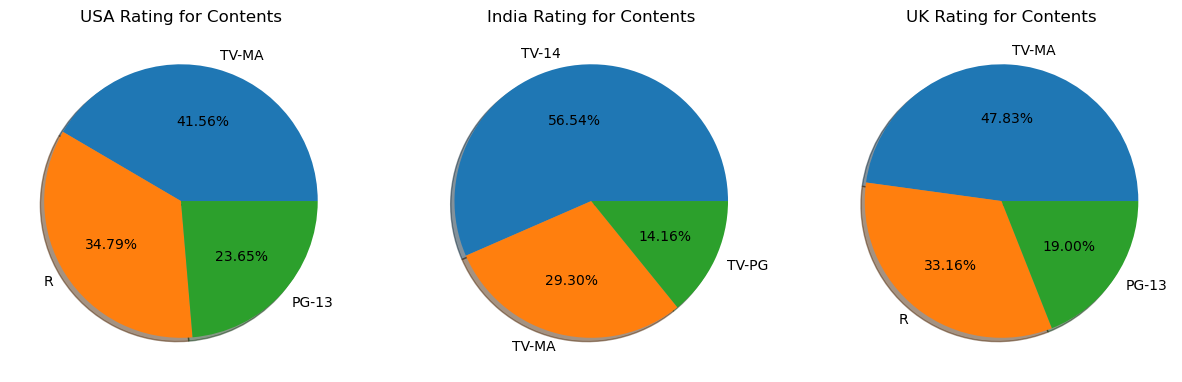

In [1985]:
USA = df_final.loc[df_final['country']=='United States']
USA_rating = (USA['rating'].value_counts(normalize =True)*100).head(3)

India = df_final.loc[df_final['country']=='India']
India_rating = (India['rating'].value_counts(normalize =True)*100).head(3)

UK = df_final.loc[df_final['country']=='United Kingdom']
UK_rating = (UK['rating'].value_counts(normalize =True)*100).head(3)

fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].pie(USA_rating, labels=USA_rating.index, autopct='%.2f%%', shadow=True)
axes[0].set_title('USA Rating for Contents')

axes[1].pie(India_rating, labels=India_rating.index, autopct='%.2f%%', shadow=True)
axes[1].set_title('India Rating for Contents')

axes[2].pie(UK_rating, labels=UK_rating.index,  autopct='%.2f%%', shadow=True)
axes[2].set_title('UK Rating for Contents')
plt.show()

### Net sum of MA and R rating is high in USA and Uk whereas there is no significance of R rating in India. 

In [ ]:
# New variable for all the movies and removing "min from duration" and converting the data type to 'int'

df_movie = df_final.loc[df_final['type']=='Movie'].copy()
df_movie['duration'] = df_movie['duration'].str.replace(" min", "")
df_movie['duration'] = df_movie['duration'].astype('int')

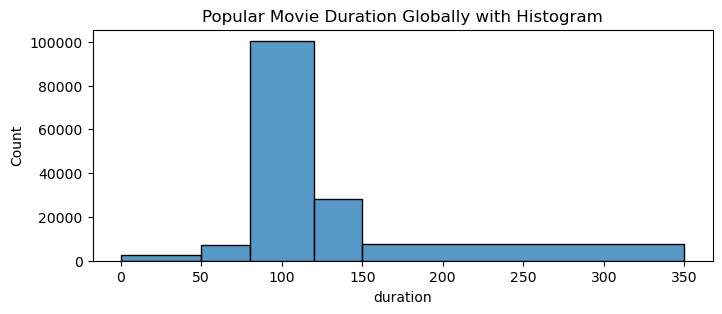

In [1952]:
plt.figure(figsize=(8,3))
sns.histplot(x = 'duration', data = df_movie, bins = [0, 50, 80, 120, 150, 350])
plt.title('Popular Movie Duration Globally with Histogram')
plt.show()

### Most of the movies' duration lies in the range of 80-120 followed by 120-150 minutes. It is quite ok to say the 80-150 minutes is the sweet spot we would want for movies

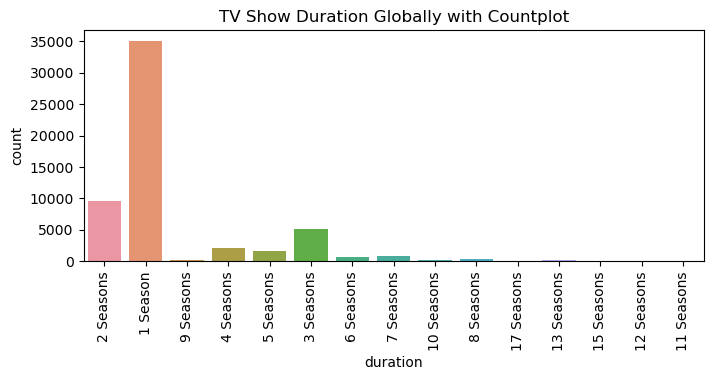

In [1953]:
df_TV_show = df_final.loc[df_final['type']=='TV Show'].copy()

plt.figure(figsize=(8,3))
sns.countplot(x = 'duration', data = df_TV_show)
plt.title('TV Show Duration Globally with Countplot')
plt.xticks(rotation=90)
plt.show()

### TV shows of 1 season only is the most prevalent followed by 2 seasons

In [1745]:
# No. of disticnct titles based on 'Country'

df_final.groupby('country').agg({'title':'nunique'}).head()

,title
country,
,8
Afghanistan,1
Albania,1
Algeria,3
Angola,2


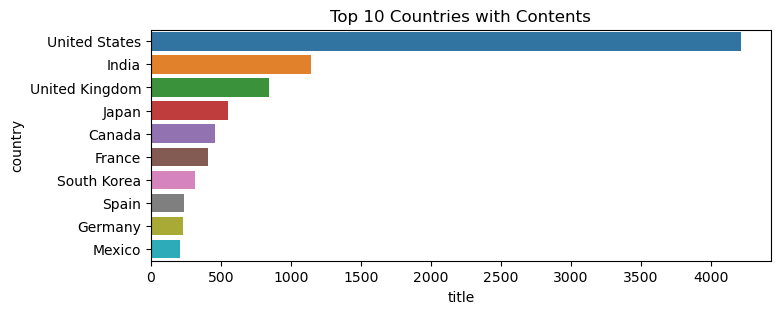

In [1803]:
df_country = df_final.groupby('country').agg({'title':'nunique'}).reset_index().sort_values(by=['title'], 
                                                                                            ascending=False).head(10)
plt.figure(figsize=(8,3))
sns.barplot(data=df_country, 
            x='title', y='country', orient='h')
plt.title('Top 10 Countries with Contents')
plt.show()

### Most of the content added on Netflix are from USA and India, USA is leading with huge margins

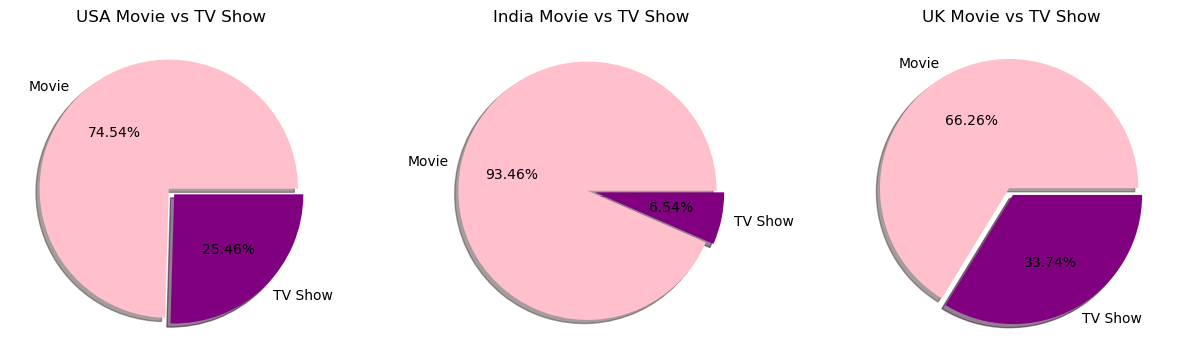

In [1917]:
US_only = df_final.loc[df_final['country']=='United States']
US_movie_TV = US_only['type'].value_counts(normalize =True)*100

India_only = df_final.loc[df_final['country']=='India']
India_movie_TV = India_only['type'].value_counts(normalize =True)*100

UK_only = df_final.loc[df_final['country']=='United Kingdom']
UK_movie_TV = UK_only['type'].value_counts(normalize =True)*100

label1 = ['Movie', 'TV Show']
color1 = ['pink', 'purple']
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].pie(US_movie_TV, labels=label1, colors=color1, explode=[0.03,0.03], autopct='%.2f%%', shadow=True)
axes[0].set_title('USA Movie vs TV Show')

axes[1].pie(India_movie_TV, labels=label1, colors=color1, explode=[0.03,0.03], autopct='%.2f%%', shadow=True)
axes[1].set_title('India Movie vs TV Show')

axes[2].pie(UK_movie_TV, labels=label1, colors=color1, explode=[0.03,0.03], autopct='%.2f%%', shadow=True)
axes[2].set_title('UK Movie vs TV Show')

plt.subplots_adjust(wspace=0.3)
plt.show()

### US is leading across both Movies & TV Shows, UK also provides great content across TV & Movie. Surprisingly India is much more prevalent in Movies as compared to TV Shows.

#### Moreover the number of Movies created in India outweigh the sum of Movies & TV in the UK as India is rated second highest in net sum of whole content on Netflix

In [1698]:
# No. of disticnct titles based on 'Genre'

df_final.groupby('genre').agg({'title':'nunique'}).head()

,title
genre,
Action & Adventure,859
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,641


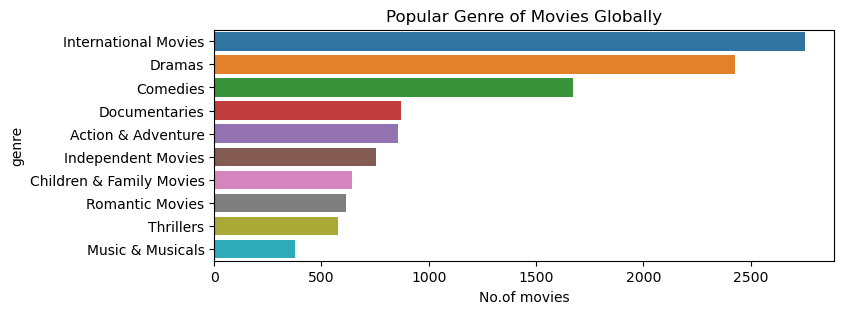

In [1951]:
movie = df_final.loc[df_final['type']=='Movie']
movie_genre = movie.groupby('genre').agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False).head(10)

plt.figure(figsize=(8,3))
sns.barplot(data=movie_genre, x='title', y='genre', orient='h')
plt.title('Popular Genre of Movies Globally')
plt.xlabel('No.of movies')
plt.show()

### Top 5 genres for movies are International Movies, Dramas, Comedies, Documentaries and Action & Adventure

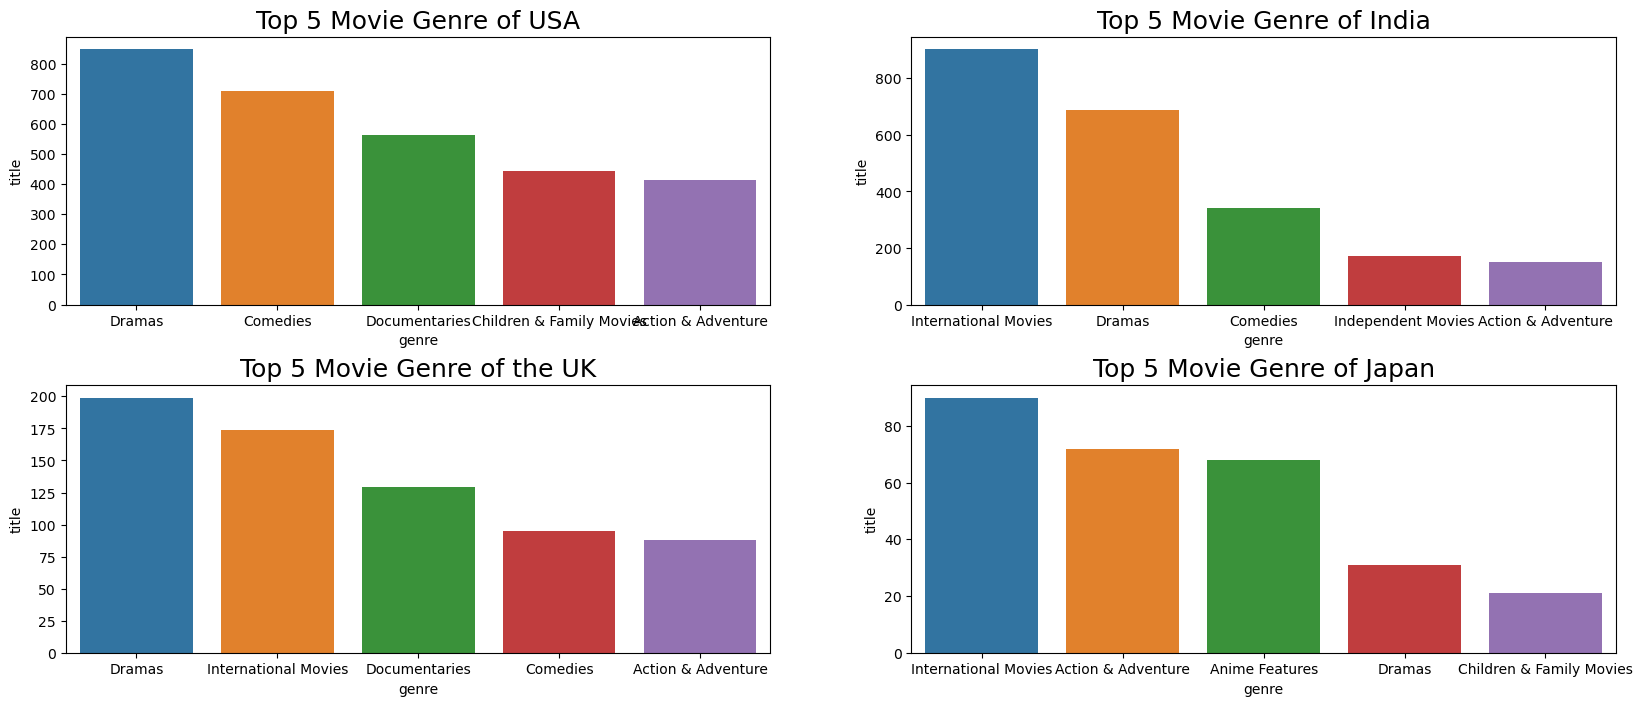

In [1930]:
USA_mov = movie.loc[movie['country']== 'United States']
IND_mov = movie.loc[movie['country']== 'India']
UK_mov = movie.loc[movie['country']== 'United Kingdom']
JPN_mov = movie.loc[movie['country']== 'Japan']

US_mov_genre =USA_mov.groupby('genre').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head()
IND_mov_genre=IND_mov.groupby('genre').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head()
UK_mov_genre = UK_mov.groupby('genre').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head()
JPN_mov_genre =JPN_mov.groupby('genre').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head()

fig, axes = plt.subplots(2, 2, figsize=(20,8))
sns.barplot(data = US_mov_genre, x='genre', y='title', orient='v', ax=axes[0, 0])
axes[0, 0].set_title('Top 5 Movie Genre of USA', fontsize=18)

sns.barplot(data = IND_mov_genre, x='genre', y='title', orient='v', ax=axes[0, 1])
axes[0, 1].set_title('Top 5 Movie Genre of India', fontsize=18)

sns.barplot(data = UK_mov_genre, x='genre', y='title', orient='v', ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Movie Genre of the UK', fontsize=18)

sns.barplot(data = JPN_mov_genre, x='genre', y='title', orient='v', ax=axes[1, 1])
axes[1, 1].set_title('Top 5 Movie Genre of Japan', fontsize=18)

plt.subplots_adjust(hspace=0.3)
plt.show()

### Drama, Comedy, Documentary & International Movies seems to be the most popular in all the countries. However, in Japan, Anime Features genre is 3rd most popular

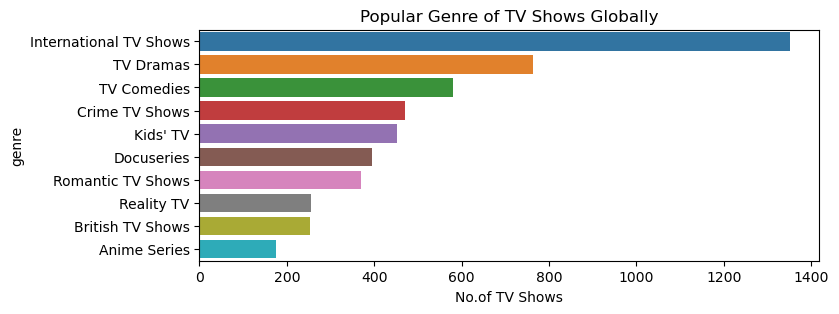

In [1950]:
TV = df_final.loc[df_final['type']=='TV Show']
TV_genre = TV.groupby('genre').agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False).head(10)

plt.figure(figsize=(8,3))
sns.barplot(data=TV_genre, x='title', y='genre', orient='h')
plt.title('Popular Genre of TV Shows Globally')
plt.xlabel('No.of TV Shows')
plt.show()

### Top 5 genres for TV are International TV, Dramas, Comedies, Crime and Kids' TV

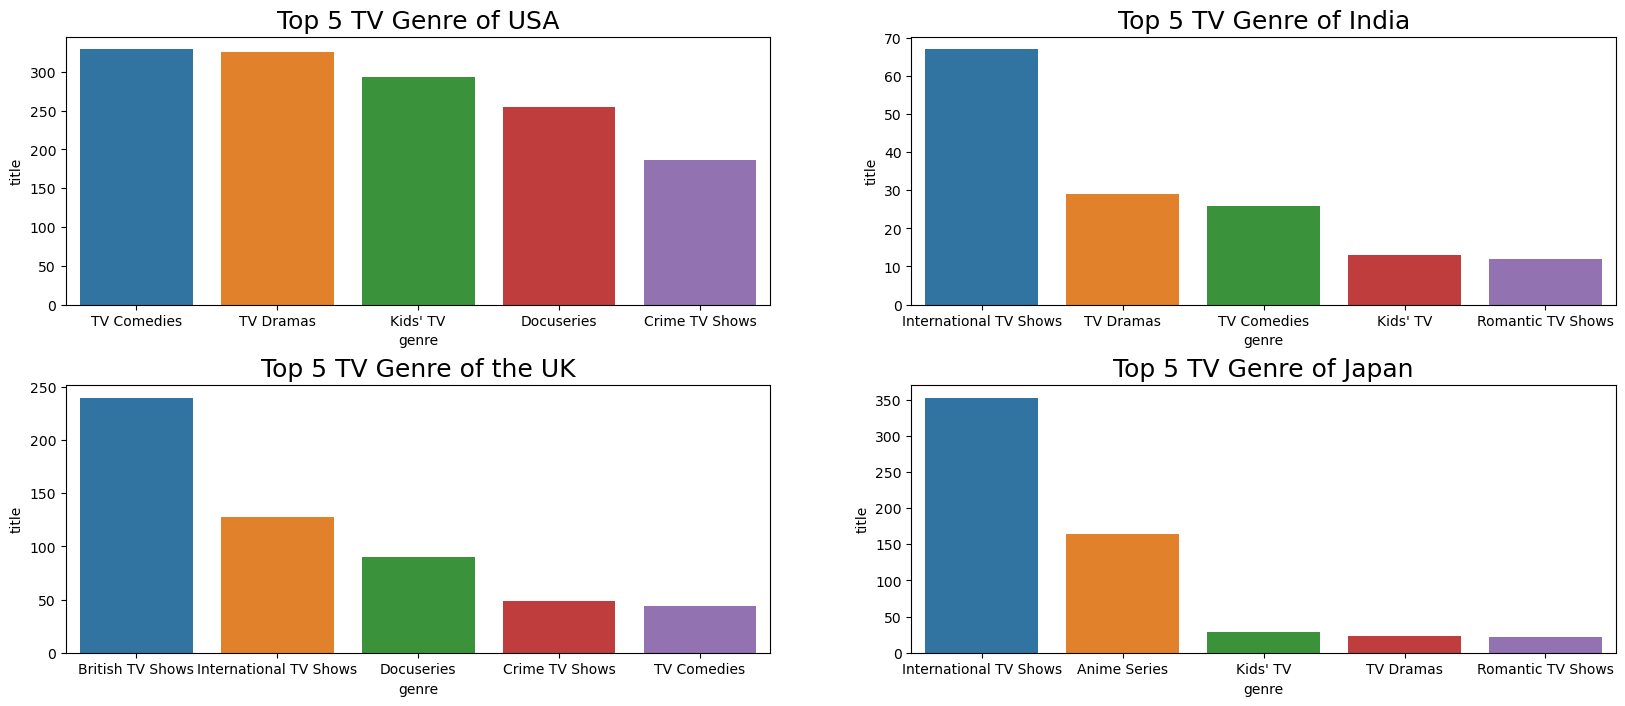

In [1932]:
USA_TV = TV.loc[TV['country']== 'United States']
IND_TV = TV.loc[TV['country']== 'India']
UK_TV = TV.loc[TV['country']== 'United Kingdom']
JPN_TV = TV.loc[TV['country']== 'Japan']

US_TV_genre =USA_TV.groupby('genre').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head()
IND_TV_genre=IND_TV.groupby('genre').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head()
UK_TV_genre = UK_TV.groupby('genre').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head()
JPN_TV_genre =JPN_TV.groupby('genre').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head()

fig, axes = plt.subplots(2, 2, figsize=(20,8))
sns.barplot(data = US_TV_genre, x='genre', y='title', orient='v', ax=axes[0, 0])
axes[0, 0].set_title('Top 5 TV Genre of USA', fontsize=18)

sns.barplot(data = IND_TV_genre, x='genre', y='title', orient='v', ax=axes[0, 1])
axes[0, 1].set_title('Top 5 TV Genre of India', fontsize=18)

sns.barplot(data = UK_TV_genre, x='genre', y='title', orient='v', ax=axes[1, 0])
axes[1, 0].set_title('Top 5 TV Genre of the UK', fontsize=18)

sns.barplot(data = JPN_TV_genre, x='genre', y='title', orient='v', ax=axes[1, 1])
axes[1, 1].set_title('Top 5 TV Genre of Japan', fontsize=18)

plt.subplots_adjust(hspace=0.3)
plt.show()

### Same as movie, TV Shows are also popular across International, Drama, and Comedy. Anime genre in Japan is the 2nd most popular for TV shows

In [1696]:
# No. of disticnct titles based on 'cast'

df_final.groupby('cast').agg({'title':'nunique'}).head()

,title
cast,
Jr.,2
"""Riley"" Lakdhar Dridi",1
'Najite Dede,2
2 Chainz,1
2Mex,1


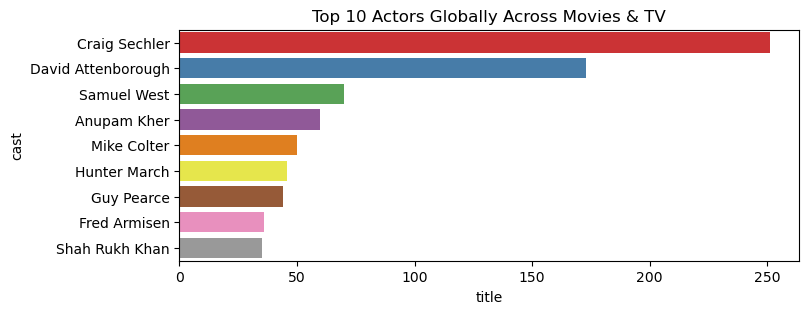

In [1954]:
df_Actor = df_final.groupby('cast').agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False).head(10)
df_Actor = df_Actor[df_Actor['cast']!= 'Unknown Cast']

plt.figure(figsize=(8,3))
sns.barplot(data=df_Actor, x='title', y='cast', orient='h', palette='Set1')
plt.title('Top 10 Actors Globally Across Movies & TV')
plt.show()

### Craig Sechler, David Atttenborough & Samuel West are the most popular actors for the contents on Netflix

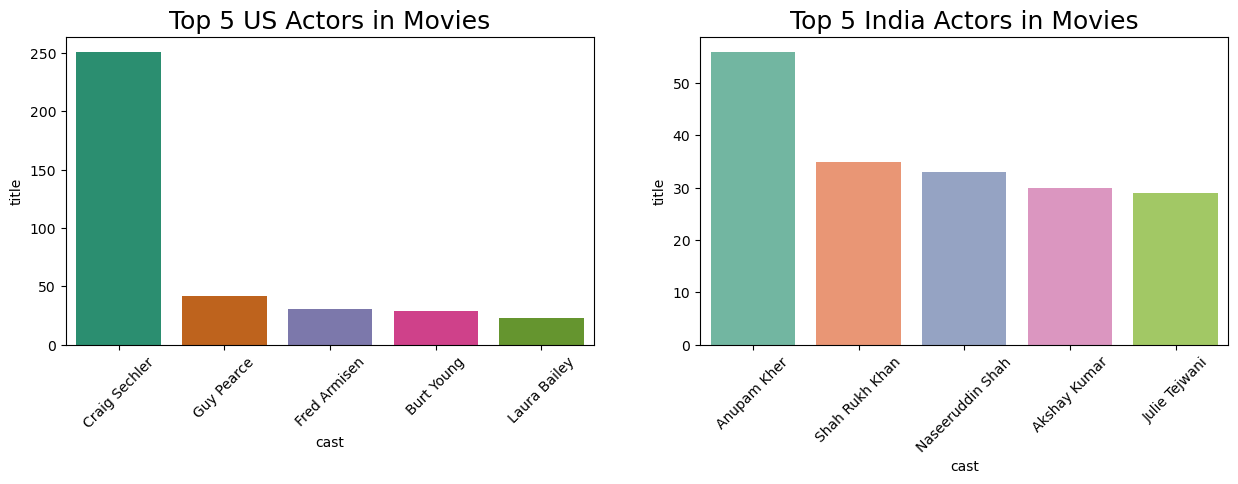

In [1946]:
df_Cast = df_final.groupby(['cast', 'country', 'type']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_Cast = df_Cast[df_Cast['cast']!= 'Unknown Cast']

Mov_cast_US = df_Cast.loc[(df_Cast['country']== 'United States') & (df_Cast['type']== 'Movie')].head()
Mov_cast_IND = df_Cast.loc[(df_Cast['country']== 'India') & (df_Cast['type']== 'Movie')].head()

fig, axes = plt.subplots(1, 2, figsize=(15,4))
sns.barplot(data=Mov_cast_US, x='cast', y='title', ax=axes[0], palette='Dark2')
sns.barplot(data=Mov_cast_IND, x='cast', y='title', ax=axes[1], palette='Set2')

axes[0].set_title('Top 5 US Actors in Movies', fontsize=18)
axes[1].set_title('Top 5 India Actors in Movies', fontsize=18)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.show()

### Craig Sechler and 'Anupam Kher, Shah Rukh Khan' are the most popular movie actors for the top 2 countries USA & India respectively

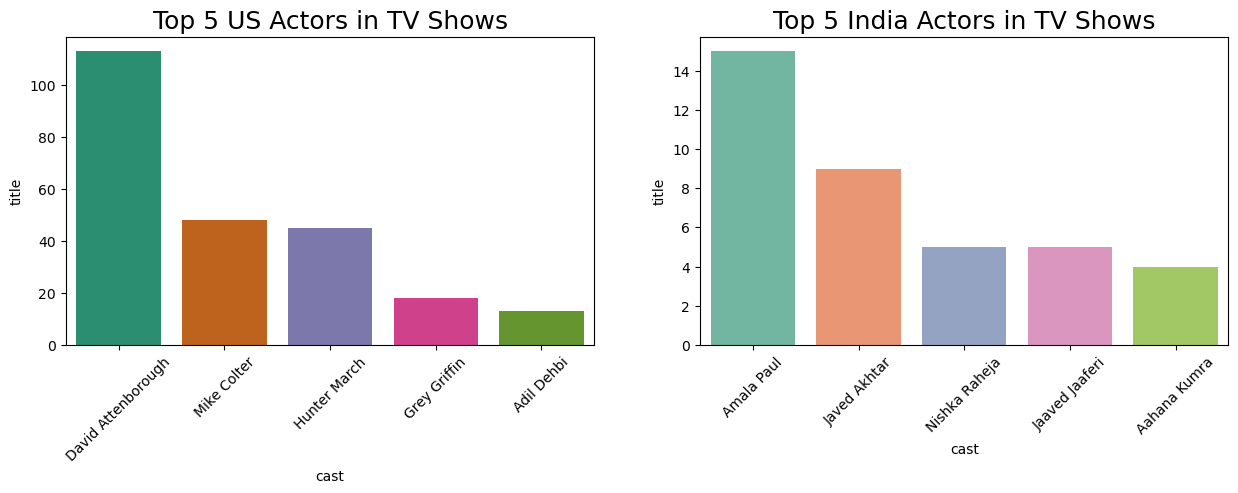

In [1947]:
df_Cast = df_final.groupby(['cast', 'country', 'type']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_Cast = df_Cast[df_Cast['cast']!= 'Unknown Cast']

TV_cast_US = df_Cast.loc[(df_Cast['country']== 'United States') & (df_Cast['type']== 'TV Show')].head()
TV_cast_IND = df_Cast.loc[(df_Cast['country']== 'India') & (df_Cast['type']== 'TV Show')].head()

fig, axes = plt.subplots(1, 2, figsize=(15,4))
sns.barplot(data = TV_cast_US, x='cast', y='title', ax=axes[0], palette='Dark2')
sns.barplot(data = TV_cast_IND, x='cast', y='title', ax=axes[1], palette='Set2')

axes[0].set_title('Top 5 US Actors in TV Shows', fontsize=18)
axes[1].set_title('Top 5 India Actors in TV Shows', fontsize=18)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.show()

### David Attenborough, Mike Colter in USA and Amala Paul, Javed Akhtar in India are the most popular TV actors

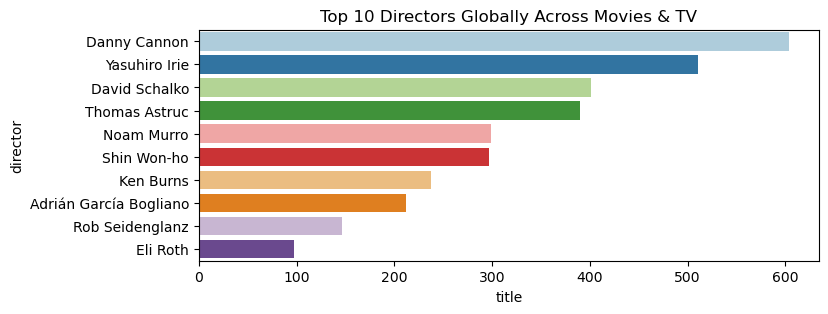

In [1956]:
df_director = df_final.groupby('director').agg({'title':'nunique'}).reset_index().sort_values(by=['title'], 
                                                                                              ascending=False).head(10)

plt.figure(figsize=(8,3))
sns.barplot(data=df_director, 
            x='title',
            y='director', orient='h', palette = 'Paired')
plt.title('Top 10 Directors Globally Across Movies & TV')
plt.show()

### Danny Cannon, Yasuhiro Irie, David Schalko & Thomas Astruc are the top 4 popular directors for the contents on Netflix

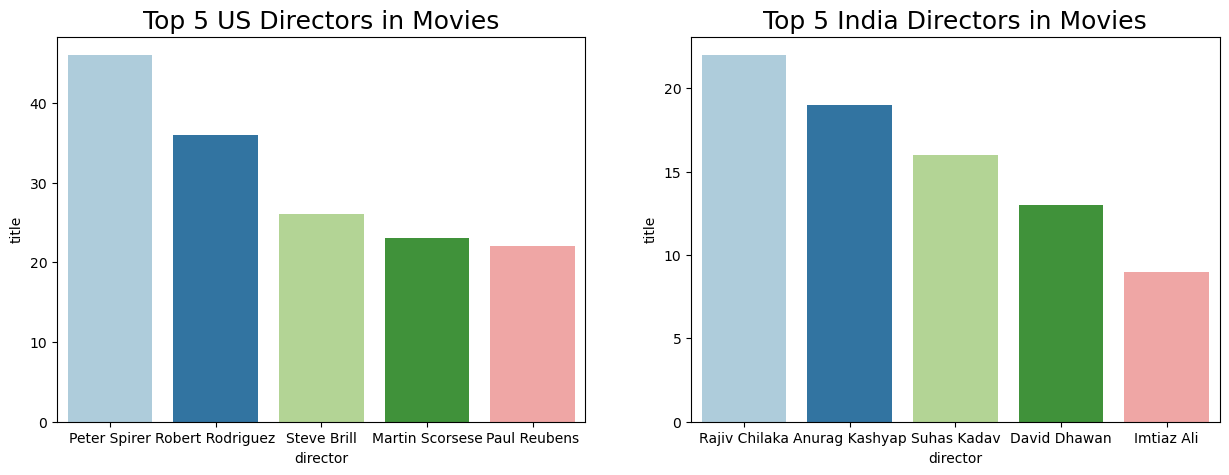

In [1957]:
df_Dir=df_final.groupby(['director','country','type']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)

Mov_Dir_US = df_Dir.loc[(df_Dir['country']== 'United States') & (df_Dir['type']== 'Movie')].head()
Mov_Dir_IND = df_Dir.loc[(df_Dir['country']== 'India') & (df_Dir['type']== 'Movie')].head()

fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(data=Mov_Dir_US, x='director', y='title', ax=axes[0], palette='Paired')
sns.barplot(data=Mov_Dir_IND, x='director', y='title', ax=axes[1], palette='Paired')

axes[0].set_title('Top 5 US Directors in Movies', fontsize=18)
axes[1].set_title('Top 5 India Directors in Movies', fontsize=18)
plt.show()

### Peter Spiree, Robert Rodriguez in USA and Rajiv Chilaka, Anurag Kashyam are the 2 most popular movie directors on Netflix

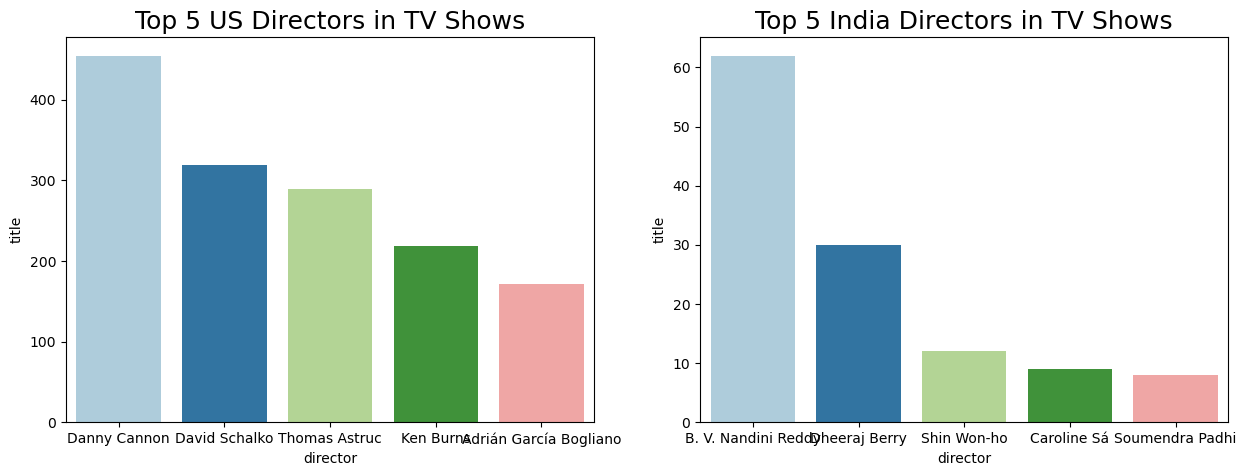

In [1959]:
df_Dir=df_final.groupby(['director','country','type']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)

TV_Dir_US = df_Dir.loc[(df_Dir['country']== 'United States') & (df_Dir['type']== 'TV Show')].head()
TV_Dir_IND = df_Dir.loc[(df_Dir['country']== 'India') & (df_Dir['type']== 'TV Show')].head()

fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(data=TV_Dir_US, x='director', y='title', ax=axes[0], palette='Paired')
sns.barplot(data=TV_Dir_IND, x='director', y='title', ax=axes[1], palette='Paired')

axes[0].set_title('Top 5 US Directors in TV Shows', fontsize=18)
axes[1].set_title('Top 5 India Directors in TV Shows', fontsize=18)
plt.show()

### Danny Cannon, David Schalko in USA and B. V. Nandini Reddy, Dheeraj Berry are the 2 most popular TV shows directors on Netflix

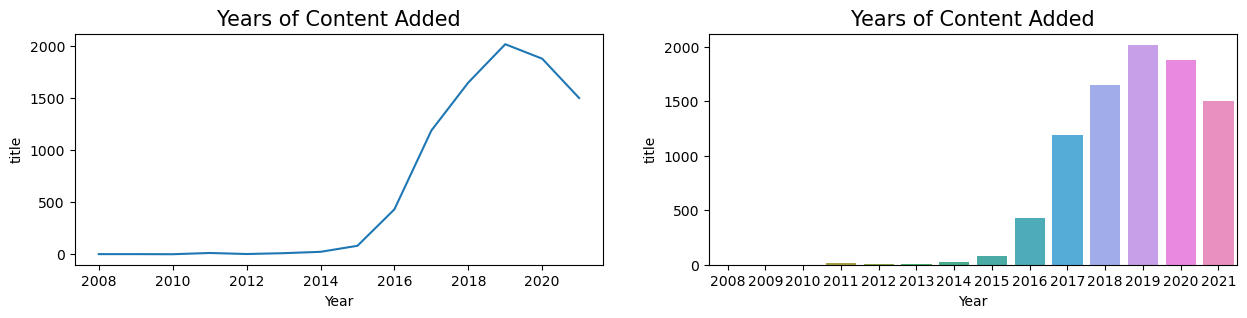

In [1961]:
df_final["date_added"] = pd.to_datetime(df_final["date_added"])
df_final["Year"] = df_final["date_added"].dt.year
df_final["Month"] = df_final["date_added"].dt.month


# No. of disticnct titles based on year and month

df_year = df_final.groupby('Year').agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15,3))
sns.lineplot(data = df_year, x= 'Year', y= 'title', ax=axes[0])
sns.barplot(data = df_year, x= 'Year', y= 'title', ax=axes[1])
axes[0].set_title('Years of Content Added', fontsize=15)
axes[1].set_title('Years of Content Added', fontsize=15)
plt.show()

### Most of the contents were added on th eplatform in 2019 followed by 2020, 2018, 2021 and 2017

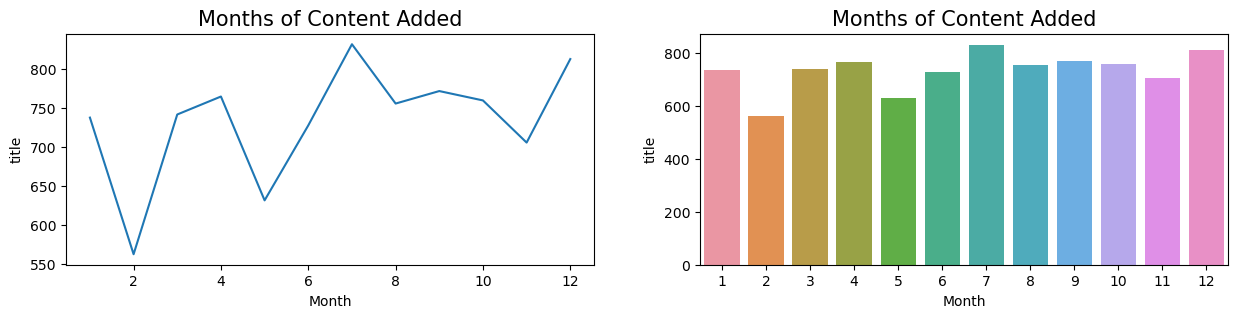

In [1912]:
df_month = df_final.groupby('Month').agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15,3))
sns.lineplot(data = df_month, x= 'Month', y= 'title', ax=axes[0])
sns.barplot(data = df_month, x= 'Month', y= 'title', ax=axes[1])
axes[0].set_title('Months of Content Added', fontsize=15)
axes[1].set_title('Months of Content Added', fontsize=15)
plt.show()

### Most of the content were added on Netflix in the month of January, July and December

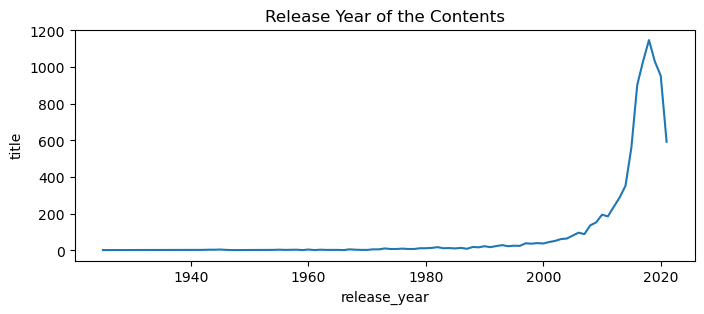

In [1911]:
df_year = df_final.groupby('release_year').agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)

plt.figure(figsize=(8,3))
sns.lineplot(data = df_year, x= 'release_year', y= 'title')
plt.title('Release Year of the Contents')
plt.show()

### Net content realease which are later uploaded on Netflix has increased since 2000 till 2020 and then reduced most probably because of COVID-19
### Release of both Movies and TV Shows have taken hit after 2020

# 👇Showing the number of movies released based on each year

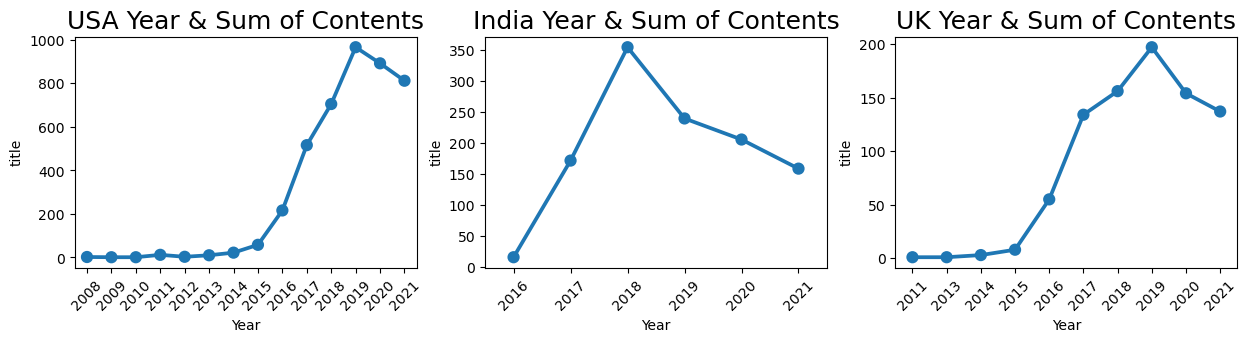

In [2007]:
USA_contents = USA.groupby('Year').agg({'title':'nunique'}).reset_index()
India_contents = India.groupby('Year').agg({'title':'nunique'}).reset_index()
UK_contents = UK.groupby('Year').agg({'title':'nunique'}).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15,3))
sns.pointplot(data=USA_contents, x='Year', y='title', ax=axes[0])
sns.pointplot(data=India_contents, x='Year', y='title', ax=axes[1])
sns.pointplot(data=UK_contents, x='Year', y='title', ax=axes[2])

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

axes[0].set_title('USA Year & Sum of Contents', fontsize=18)
axes[1].set_title('India Year & Sum of Contents', fontsize=18)
axes[2].set_title('UK Year & Sum of Contents', fontsize=18)
plt.show()

## Insights:

Undoubtedly the USA and India are the 2 countries which bring the most contents on Netflix with USA being the market leader. United Kingdom and Japan are on 3rd and 4th rank in providing contents on Netflix.

Net sum of TV shows in India is very low(6.5%) as compared to the top countries USA(25.5%) and UK(33.7%)while overall part of the TV Shows is 27.8%

### Duration

Around 100 minutes for Movies and 1 season for TV Shows are the most common duration across the globe.

### Rating

Rating of TV-MA(Mature Audience) and TV-14 is most popular among both types and all the countries.

### Genre

The USA and the UK are producing Drama genre the most, India is most ahead in International Movie with Drama on the second most. Japan has International Movie on top and on the second highest is Action & Adventure with Anime on the 3rd.

When it comes to TV Shows, Comedy, Drama and International TV are the winners of all which has bee inferred from the top 4 countries.

### Actors & Directors

From the exploration of data, it is visible that there are a few Actors and Director who are there in most of the contents for all the countries such as 'Craig Sechler' in USA and 'Anupam Kher' in India are the most common Actors for Movies with huge margin. Same is the case for other countries and for TV Shows as well. It is also the case for Directors of Movies and TV Shows at least for the top 4 countries that have been visualized.

### Release Year & Date Added

It is plausible to say that the contents are mostly released in the recent years with the peak in graph from 2015 with 2019 being the highest for 'release' and 'date_added' both. However, after 2020, there is a sharp decline due to COVID-19. 

## Recommendation: 

1) Contents aligning with the most popular genres across countries and for both Movie & Tv Shows are recommended, i.e. Drama, Comedy & International.

2) TV Shows should be added in the month of July/August and movies during the last/first month of the year.

3) 80-120 minutes is recommended length of movie for almost all the countries especially in the USA where kids TV show is also popular along with the genres in first places, hence recommended.

4) The target audience in USA and India is recommended to be 14+ and above rating while for the UK it is suggested to be completely Mature/R rating

5) Advisable to add more movies for Indian audience since there is a decline after 2018.

6) Anime genre for Japan and romantic TV show for South Korea is recommended.

7) While creating content, the popular director/actor combination and individually of a particular country should be considered.